## Import Libraries

In [8]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
directory = "/content/drive/MyDrive/cs598project/data"

Mounted at /content/drive


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## For handling null values
from sklearn.impute import SimpleImputer
from scipy.stats import shapiro
from scipy.stats import normaltest

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryFocalCrossentropy
import tensorflow_addons as tfa
from focal_loss import BinaryFocalLoss


## load Data

In [10]:
# df = pd.read_csv('/content/drive/MyDrive/train_w_icd.csv')
df = pd.read_csv(f"{directory}/processed/train_final.csv", low_memory=False)

## Number of Rows and Columns

In [11]:
## Dimensionlaity of the Model
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 2470460
Number of Columns: 75


## Columns

In [12]:
df.columns

Index(['SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'INSURANCE', 'GENDER',
       'ETHNICITY', 'AGE', 'CHARTTIME', '51', '184', '211', '442', '454',
       '455', '618', '723', '1352', '1495', '1524', '1880', '6701', '6754',
       '8368', '8440', '8441', '8555', '220045', '220050', '220051', '220179',
       '220180', '220181', '220210', '220274', '220603', '220734', '220739',
       '223761', '223762', '223830', '223900', '223901', '224167', '224643',
       '225309', '225310', '226707', '226755', '226756', '226757', '226758',
       '227013', '227242', '227243', 'icd_0', 'icd_1', 'icd_2', 'icd_3',
       'icd_4', 'icd_5', 'icd_6', 'icd_7', 'icd_8', 'icd_9', 'icd_10',
       'icd_11', 'icd_12', 'icd_13', 'icd_14', 'icd_15', 'icd_16', 'icd_17',
       'icd_18', 'icd_19', 'target'],
      dtype='object')

# Type of Columns

In [13]:
df.dtypes

SUBJECT_ID      int64
HADM_ID         int64
ICUSTAY_ID      int64
INSURANCE      object
GENDER         object
               ...   
icd_16        float64
icd_17        float64
icd_18        float64
icd_19        float64
target          int64
Length: 75, dtype: object

## Summary of Data

In [14]:
df.describe()

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,AGE,51,184,211,442,454,455,...,icd_11,icd_12,icd_13,icd_14,icd_15,icd_16,icd_17,icd_18,icd_19,target
count,2.470460e+06,2.470460e+06,2.470460e+06,2.470460e+06,415194.000000,314262.000000,1.101587e+06,1115.00000,313099.000000,696849.000000,...,2.470417e+06,2.470417e+06,2.470417e+06,2.470417e+06,2.470417e+06,2.470417e+06,2.470417e+06,2.470417e+06,2.470417e+06,2.470460e+06
mean,4.141820e+04,1.500102e+05,2.498828e+05,7.407056e+01,124.122038,3.749244,8.397330e+01,121.09930,5.801104,121.811305,...,1.258026e-01,2.193439e-01,3.800492e-02,2.833530e-05,4.034274e-01,4.543322e-01,5.598342e-01,3.624348e-01,1.258237e-01,1.987994e-01
std,2.978095e+04,2.885100e+04,2.903688e+04,5.359179e+01,24.616683,0.652173,1.645516e+01,25.20646,0.764100,22.272913,...,3.316269e-01,4.138022e-01,1.912082e-01,5.323017e-03,4.905852e-01,4.979102e-01,4.964071e-01,4.807035e-01,3.316506e-01,3.990968e-01
min,3.000000e+00,1.000010e+05,2.000010e+05,1.800000e+01,0.000000,1.000000,0.000000e+00,0.00000,1.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.588100e+04,1.250850e+05,2.245550e+05,5.300000e+01,107.000000,4.000000,7.200000e+01,105.00000,6.000000,106.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.078900e+04,1.499890e+05,2.497670e+05,6.500000e+01,122.000000,4.000000,8.300000e+01,120.00000,6.000000,120.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.740800e+04,1.750280e+05,2.750460e+05,7.700000e+01,140.000000,4.000000,9.400000e+01,136.00000,6.000000,136.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,9.999900e+04,1.999990e+05,2.999990e+05,3.100000e+02,298.000000,4.000000,2.400000e+02,240.00000,6.000000,274.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## Visulizing

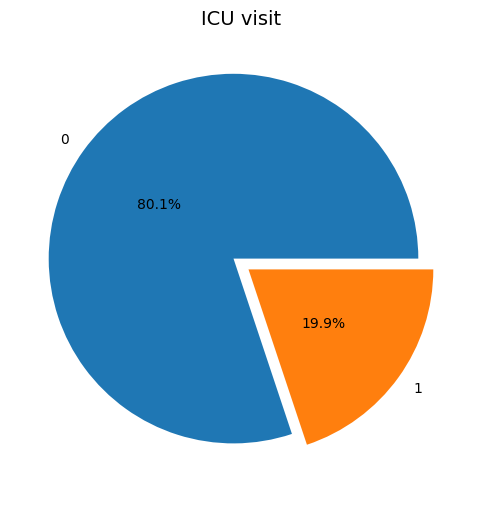

In [15]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=df['target'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=df['target'].value_counts().index, pctdistance=0.5)
plt.title("ICU visit", fontsize=14);
plt.show()

## Total Enticites 

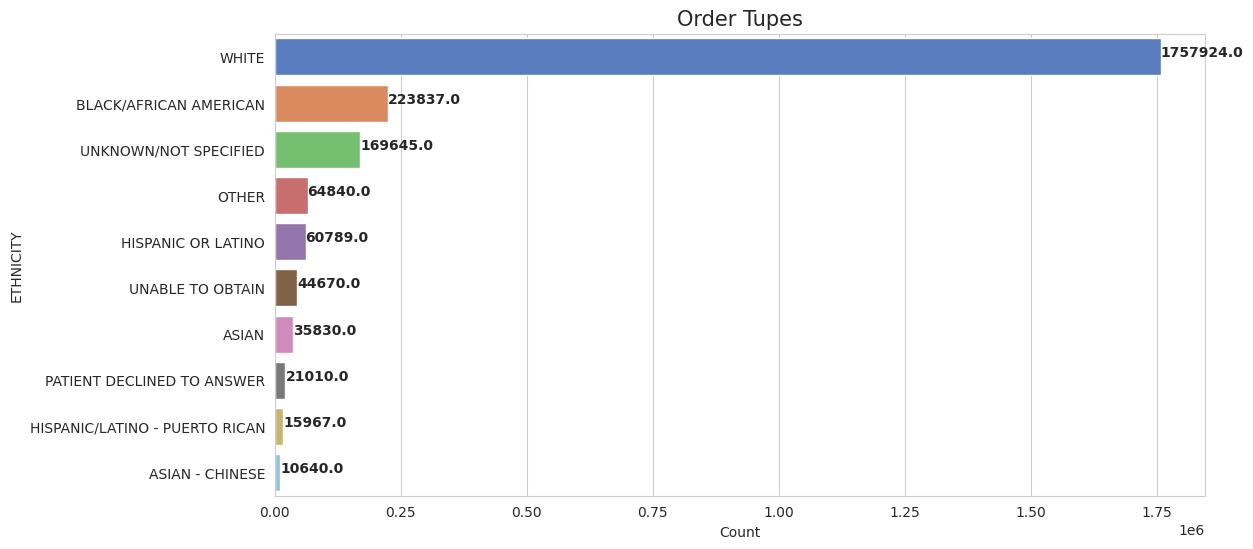

In [16]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(x=df['ETHNICITY'].value_counts()[0:10], y=df['ETHNICITY'].value_counts().index[0:10], data=df, errorbar=None, palette="muted")
ax.set_title("Order Tupes", fontsize=15)
ax.set_xlabel ("Count")
ax.set_ylabel ("ETHNICITY")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f"% rect.get_width(), weight='bold' )

## Check any null data

In [17]:
# Iterate through each column
for col in df.columns:
    # Count number of NaN/None values
    null_count = df[col].isnull().sum()
    
    # Print column name and number of NaN/None values
    if null_count > 0:
        print(f"Column: {col}, Null Rows: {null_count}")

Column: 51, Null Rows: 2055266
Column: 184, Null Rows: 2156198
Column: 211, Null Rows: 1368873
Column: 442, Null Rows: 2469345
Column: 454, Null Rows: 2157361
Column: 455, Null Rows: 1773611
Column: 618, Null Rows: 1399052
Column: 723, Null Rows: 2157688
Column: 1352, Null Rows: 2470448
Column: 1495, Null Rows: 2470428
Column: 1524, Null Rows: 2469616
Column: 1880, Null Rows: 2470439
Column: 6701, Null Rows: 2466800
Column: 6754, Null Rows: 2470447
Column: 8368, Null Rows: 2055368
Column: 8440, Null Rows: 2469370
Column: 8441, Null Rows: 1774027
Column: 8555, Null Rows: 2466800
Column: 220045, Null Rows: 1406358
Column: 220050, Null Rows: 2217115
Column: 220051, Null Rows: 2217182
Column: 220179, Null Rows: 1817304
Column: 220180, Null Rows: 1817549
Column: 220181, Null Rows: 1816299
Column: 220210, Null Rows: 1415569
Column: 220274, Null Rows: 2467379
Column: 220603, Null Rows: 2469683
Column: 220734, Null Rows: 2464808
Column: 220739, Null Rows: 2243232
Column: 223761, Null Rows: 226

## Handling Null Values

In [18]:
def handle_missing_values(df, threshold, alpha=0.05):
    # Calculate the total number of rows
    num_rows = df.shape[0]

    # Remove columns with a high percentage of missing values
    for column in df.columns:
        null_rows = df[column].isnull().sum()
        if null_rows / num_rows > threshold:
            df.drop(column, axis=1, inplace=True)

    # Impute missing values for the remaining columns
    for column in df.columns:
        # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(df[column]):
            # Check if the column is normally distributed
            _, p_value = normaltest(df[column].dropna())
            is_normal = p_value > alpha

            if is_normal:
                # Mean imputation for continuous variables with normal distribution
                mean_imputer = SimpleImputer(strategy='mean')
                df[column] = mean_imputer.fit_transform(df[column].values.reshape(-1, 1))
            else:
                # Median imputation for skewed variables
                median_imputer = SimpleImputer(strategy='median')
                df[column] = median_imputer.fit_transform(df[column].values.reshape(-1, 1))
        else:
            # Mode imputation for categorical variables
            mode_imputer = SimpleImputer(strategy='most_frequent')
            df[column] = mode_imputer.fit_transform(df[column].values.reshape(-1, 1))

    return df

threshold = 0.8
df = handle_missing_values(df, threshold)

## Number of Rows and Columns after Handling null values

In [19]:
## Dimensionlaity of the Model
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 2470460
Number of Columns: 38


In [20]:
# Add 'Feature_' before numeric column names
numeric_columns = [211, 455, 618, 8441, 220045, 220179, 220180, 220181, 220210]
new_column_names = {col: f'Feature_{col}' for col in numeric_columns}
df.rename(columns=new_column_names, inplace=True)

## Dropping Unneccary column

In [21]:
# Drop the 'Unnamed: 0' column
df.drop(['SUBJECT_ID','HADM_ID','ICUSTAY_ID'], axis=1, inplace=True)

## Applying One-Hot Encoder for Categoircal Features

In [22]:
# Encode categorical variables
encoder = OneHotEncoder()
encoded_categorical = encoder.fit_transform(df[['INSURANCE', 'GENDER', 'ETHNICITY']])
encoded_categorical_df = pd.DataFrame(encoded_categorical.toarray(), columns=encoder.get_feature_names_out(['INSURANCE', 'GENDER', 'ETHNICITY']))

# Reset the index of both DataFrames to ensure proper concatenation
df.reset_index(drop=True, inplace=True)
encoded_categorical_df.reset_index(drop=True, inplace=True)

# Concatenate the DataFrames
df_encoded = pd.concat([df.drop(['INSURANCE', 'GENDER', 'ETHNICITY'], axis=1), encoded_categorical_df], axis=1)

# Handle date-time features


In [23]:
df_encoded['CHARTTIME'] = pd.to_datetime(df_encoded['CHARTTIME'])
df_encoded['charttime_day'] = df_encoded['CHARTTIME'].dt.day
df_encoded['charttime_month'] = df_encoded['CHARTTIME'].dt.month
df_encoded['charttime_year'] = df_encoded['CHARTTIME'].dt.year
df_encoded.drop('CHARTTIME', axis=1, inplace=True)

## Aggregate medical codes: You can create a count of unique ICD codes per patient by aggregating the icd_* columns.

In [24]:
icd_columns = [col for col in df_encoded.columns if col.startswith('icd_')]
df_encoded['unique_icd_count'] = df_encoded[icd_columns].nunique(axis=1)

## Final Data

In [25]:
df_encoded.head()

,AGE,211,455,618,8441,220045,220179,220180,220181,220210,...,ETHNICITY_UNKNOWN/NOT SPECIFIED,ETHNICITY_WHITE,ETHNICITY_WHITE - BRAZILIAN,ETHNICITY_WHITE - EASTERN EUROPEAN,ETHNICITY_WHITE - OTHER EUROPEAN,ETHNICITY_WHITE - RUSSIAN,charttime_day,charttime_month,charttime_year,unique_icd_count
0,74.0,86.0,120.0,17.0,58.0,82.0,119.0,62.0,76.0,19.0,...,0.0,1.0,0.0,0.0,0.0,0.0,22,12,2149,2
1,74.0,85.0,120.0,18.0,58.0,82.0,119.0,62.0,76.0,19.0,...,0.0,1.0,0.0,0.0,0.0,0.0,22,12,2149,2
2,74.0,87.0,120.0,21.0,58.0,82.0,119.0,62.0,76.0,19.0,...,0.0,1.0,0.0,0.0,0.0,0.0,22,12,2149,2
3,74.0,94.0,120.0,21.0,58.0,82.0,119.0,62.0,76.0,19.0,...,0.0,1.0,0.0,0.0,0.0,0.0,22,12,2149,2
4,74.0,91.0,120.0,21.0,58.0,82.0,119.0,62.0,76.0,19.0,...,0.0,1.0,0.0,0.0,0.0,0.0,22,12,2149,2


In [26]:
df_encoded.to_csv('data.csv',index=None)

In [27]:
df_encoded = pd.read_csv('/content/data.csv')

## Feature Scaling


In [28]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_encoded.drop('target', axis=1))

## Feature Decompostion

In [29]:
from sklearn.decomposition import TruncatedSVD

n_components = 30  
svd = TruncatedSVD(n_components=n_components)
X_reduced = svd.fit_transform(scaled_features)

## Train Test Split

In [30]:
from tensorflow.keras.utils import to_categorical

y =  to_categorical(df_encoded['target'])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

## **Model Training**

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

## Train

In [33]:
num_classes = 2  

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_components, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

## Compile Model

In [34]:
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Focal loss for class imbalance
model.compile(loss=BinaryFocalLoss(gamma=2), optimizer='adam', metrics=['accuracy'])


## Model Summary

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 14, 64)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 64)            0         
                                                                 
 flatten (Flatten)           (None, 896)               0         
                                                                 
 dense (Dense)               (None, 50)                44850     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                        

## Train Model

In [36]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
61762/61762 [==============================] - 229s 4ms/step - loss: 0.1109 - accuracy: 0.8158 - val_loss: 0.1025 - val_accuracy: 0.8264
Epoch 2/10
61762/61762 [==============================] - 217s 4ms/step - loss: 0.1054 - accuracy: 0.8223 - val_loss: 0.0985 - val_accuracy: 0.8303
Epoch 3/10
61762/61762 [==============================] - 216s 4ms/step - loss: 0.1033 - accuracy: 0.8246 - val_loss: 0.0960 - val_accuracy: 0.8317
Epoch 4/10
61762/61762 [==============================] - 217s 4ms/step - loss: 0.1019 - accuracy: 0.8262 - val_loss: 0.0945 - val_accuracy: 0.8349
Epoch 5/10
61762/61762 [==============================] - 217s 4ms/step - loss: 0.1010 - accuracy: 0.8272 - val_loss: 0.0935 - val_accuracy: 0.8353
Epoch 6/10
61762/61762 [==============================] - 216s 4ms/step - loss: 0.1004 - accuracy: 0.8282 - val_loss: 0.0926 - val_accuracy: 0.8375
Epoch 7/10
61762/61762 [==============================] - 218s 4ms/step - loss: 0.0999 - accuracy: 0.8287 - val_

## Model Accuracy

In [37]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Test loss: 0.09170349687337875
Test accuracy: 0.8417237997055054


## Prediction

In [38]:
## Making Prediction
y_pred = model.predict(X_test)

15441/15441 [==============================] - 21s 1ms/step


## Inverse One Hot Encoding Prediction

In [39]:
## Inverse transformatin
predictions = np.array(list(map(lambda x: np.argmax(x), y_pred)))

## Inverse One Hot Encoding True Labels

In [40]:
## Inverse transformatin
y_true = np.array(list(map(lambda x: np.argmax(x), y_test)))

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Confusion Matrix

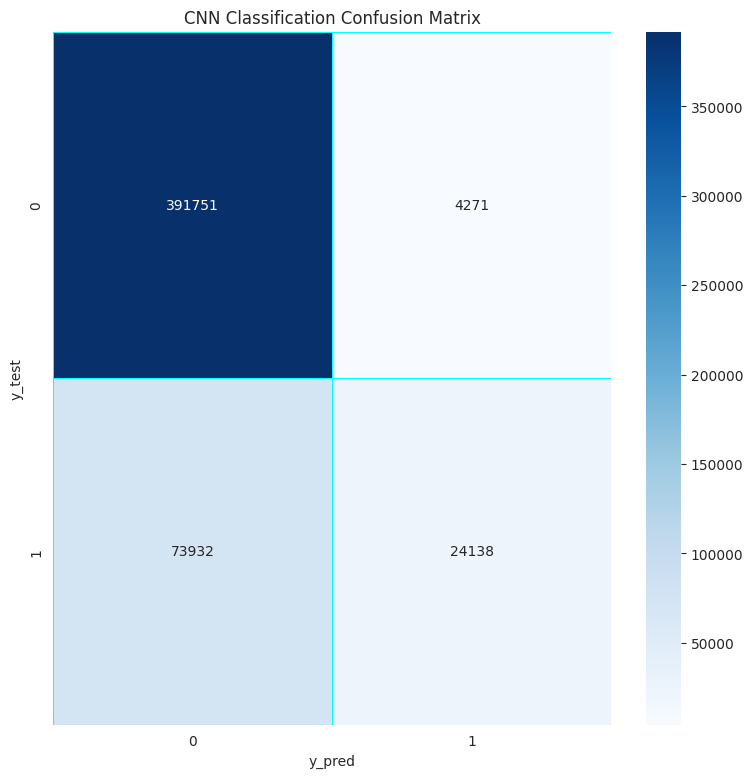

In [43]:
# Creating the confusion matrix:
e_cm = confusion_matrix(y_true, predictions)
# Visualization:
f, ax = plt.subplots(figsize=(9,9))
sns.heatmap(e_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='Blues')
plt.title('CNN Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

## **Classification Report**

It is an another method of evaluation which is used to find the precision recall and f1-score based on following formulas:

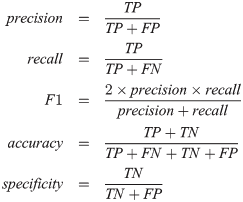

In [44]:
print(classification_report(y_true, predictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91    396022
           1       0.85      0.25      0.38     98070

    accuracy                           0.84    494092
   macro avg       0.85      0.62      0.65    494092
weighted avg       0.84      0.84      0.80    494092



## LSTM

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

## LOad Model

In [46]:
num_classes = 2  # Number of categories in the target variable

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_components, 1)))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

## Complie

In [49]:
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss=BinaryFocalLoss(gamma=2), optimizer='adam', metrics=['accuracy'])


## Train

In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=256, validation_data=(X_test, y_test))

## Model Accuracy

In [57]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Test loss: 0.10701508820056915
Test accuracy: 0.8184670209884644


## Prediction

In [52]:
## Making Prediction
y_pred = model.predict(X_test)

15441/15441 [==============================] - 85s 5ms/step


## Inverse One Hot Encoding Prediction

In [ ]:
## Inverse transformatin
predictions = np.array(list(map(lambda x: np.argmax(x), y_pred)))

## Inverse One Hot Encoding True Labels

In [54]:
## Inverse transformatin
y_true = np.array(list(map(lambda x: np.argmax(x), y_test)))

## Confusion Matrix

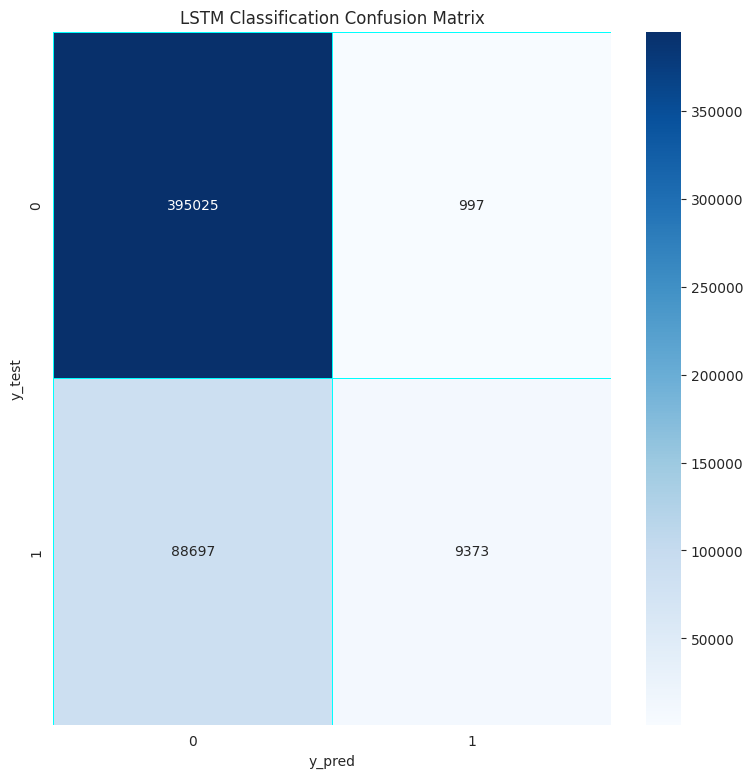

In [55]:
# Creating the confusion matrix:
e_cm = confusion_matrix(y_true, predictions)
# Visualization:
f, ax = plt.subplots(figsize=(9,9))
sns.heatmap(e_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='Blues')
plt.title('LSTM Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [56]:
print(classification_report(y_true, predictions))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90    396022
           1       0.90      0.10      0.17     98070

    accuracy                           0.82    494092
   macro avg       0.86      0.55      0.54    494092
weighted avg       0.83      0.82      0.75    494092

